In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as spo
% matplotlib inline

# get input datas
def get_stock_data(symbol):
    df = pd.read_csv('yahoo/20160922/{}.csv'.format(symbol), index_col='Date', parse_dates=True,
                     usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'],
                     na_values=['nan'])
    df.dropna()
    return df

def draw_rolling_statistics(df, symbol, window):
    rolling_mean = df[symbol].rolling(window=window).mean()
    rolling_std = df[symbol].rolling(window=window).std()
    bollinger_band_upper = rolling_mean + 2 * rolling_std
    bollinger_band_lower = rolling_mean - 2 * rolling_std
    plot = df[symbol].plot(title='{} rolling mean'.format(symbol), label='price')
    rolling_mean.plot(label='rolling mean', ax=plot)
    bollinger_band_upper.plot(label='upper band', ax=plot)
    bollinger_band_lower.plot(label='lower band', ax=plot)
    plot.set_xlabel("Date")
    plot.set_ylabel("Price")
    plot.legend(loc='upper left')
    plt.show()

def draw_scatter_plot(daily_returns, x_symbol, y_symbol):
    daily_returns.plot(kind='scatter', x=x_symbol, y=y_symbol, title='{} vs {} Daily return Scatter plot'.format(x_symbol, y_symbol))
    beta, alpha=np.polyfit(daily_returns[x_symbol], daily_returns[y_symbol], 1)
    plt.plot(daily_returns[x_symbol], beta * daily_returns[x_symbol] + alpha, '-', color='r')
    plt.show()

def draw_value_of_future_dollor(label, future_value, IR):
    time_years = np.linspace(0, 10, 21)
    present_value = future_value / (1 + IR) ** time_years
    plt.plot(time_years, present_value, linewidth=2.0, label=label)
    
def calculate_daily_returns(df):
    daily_returns=df.copy()
    daily_returns=(daily_returns/daily_returns.shift(1))-1
    return daily_returns[1:]

def calculate_cumulative_returns(df):
    return (df/df.ix[0]) - 1

def calculate_porfolio_value(df, start_val, symbols, allocs):
    portfolio_close_df=df[symbols]
    normalized_df=portfolio_close_df/portfolio_close_df.ix[0,:]
    alloced_df=normalized_df * allocs
    position_vals_df=alloced_df * start_val
    portfolio_val_df=position_vals_df.sum(axis=1)
    return portfolio_val_df

def calculate_intrinsic_value(dividends_per_year, discount_rate):
    return dividends_per_year / discount_rate

def calculate_book_value(total_assets, intangible_assets, liabilities):
    return total_assets - intangible_assets - liabilities

def calculate_market_capitalization(number_of_shares, price_per_share):
    return number_of_shares * price_per_share

def calculate_capm_stock_return(market_return, stock_alpha, stock_beta):
    if stock_alpha < 0:
        return -(stock_beta * market_return + stock_alpha)
    return stock_beta * market_return + stock_alpha

def calculate_capm_portfolio_return(market_return, allocs, alphas, betas):
    return (allocs * betas * market_return + allocs * alphas).sum()

def error(allocs, betas):
    for alloc in allocs:
        if alloc >= 1:
            return 1000000

    err = abs(allocs[0] * betas[0] + allocs[1] * betas[1]) + abs(sum(abs(allocs)) - 1)
    return err

def fit_line(betas, error_func):
    allocs = np.float32([.9, .1])
    result = spo.minimize(error_func, allocs, args=(betas,), method="SLSQP", options={'disp': True, 'maxiter': 1000})
    return result.x

def calculate_capm_weights_from_betas(betas):
    l_fit = fit_line(betas, error)
    print "Fitted line:C0={}, C1={}".format(l_fit[0], l_fit[1])

def calculate_momentum(df, n):
    df=df/df.shift(n)
    return df[n:] - 1

def calculate_sma(df, n):
    return (df/df.rolling(window=n,center=False).mean())[n:] - 1

def calculate_bb(df, n):
    std=(df.rolling(window=n,center=False).std())[n:]
    ma=(df.rolling(window=n,center=False).mean())[n:]
    upper_bound=ma+2*std
    lower_bound=ma-2*std
    return upper_bound, lower_bound

def normalize(df):
    return (df - df.mean())/df.std()

In [45]:
stocks = {}
symbols = ['GOOGL']
for symbol in symbols:
    stocks[symbol] = get_stock_data(symbol)
    

start_date = '2016-01-01'
end_date = '2016-05-31'
dates = pd.date_range(start_date, end_date)

adj_close_df = pd.DataFrame(index=dates)
for stock_name in stocks:
    stock = stocks[stock_name]
    temp_df = stock[['Adj Close']].rename(columns={'Adj Close': stock_name})
    adj_close_df = adj_close_df.join(temp_df)

adj_close_df.fillna(method='ffill', inplace='TRUE')
adj_close_df.fillna(method='bfill', inplace='TRUE')
adj_close_df.dropna()

print ""


C:\develop\Python27\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression:0.0


C:\develop\Python27\lib\site-packages\ipykernel\__main__.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forests:0.0529411764706


C:\develop\Python27\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


Support Vector Machine:0.0176470588235
KNN:0.591445427729
Gaussian Naive Bayes:0.390855457227


C:\develop\Python27\lib\site-packages\ipykernel\__main__.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\develop\Python27\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


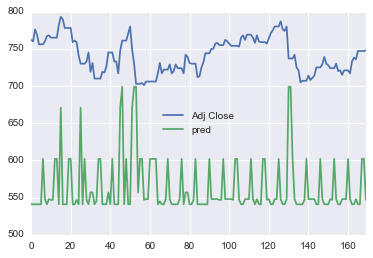

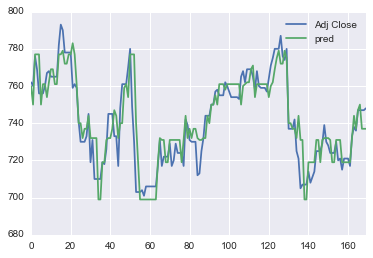

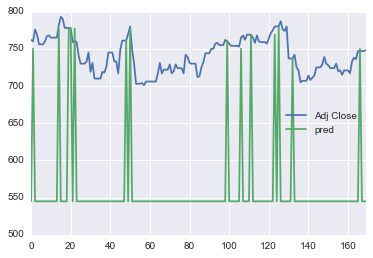

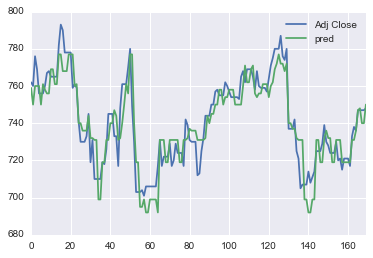

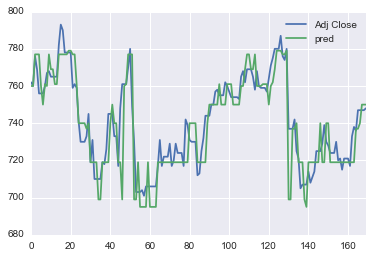

In [140]:
class Stock(object):
    def __init__(self, symbol="GOOGL", stocks={}
                 , start_date='2016-01-01', end_date='2016-05-31'
                 , momentum_window=3, sma_window=3, bollinger_bands_window=3):
        
        self.max_window=max(momentum_window, sma_window, bollinger_bands_window)
        dates = pd.date_range(start_date, end_date)

        adj_close_df = pd.DataFrame(index=dates)
        stock = stocks[symbol]
        temp_df = stock[['Adj Close']]
        adj_close_df = adj_close_df.join(temp_df)

        adj_close_df.fillna(method='ffill', inplace='TRUE')
        adj_close_df.fillna(method='bfill', inplace='TRUE')
        adj_close_df.dropna()
        
        self.original_df=adj_close_df
        self.df=adj_close_df
        self.momentum_window=momentum_window
        self.sma_window=sma_window
        self.bollinger_bands_window=bollinger_bands_window
        
        self.df=self.df.join(self._calculate_daily_returns())
        self.df=self.df.join(self._calculate_cumulative_returns())
        self.df=self.df.join(self._calculate_momentum())
        self.df=self.df.join(self._calculate_sma())
        bb_upper_bound,bb_lower_bound=self._calculate_bb()
        self.df=self.df.join(bb_upper_bound)
        self.df=self.df.join(bb_lower_bound)
        self.df.fillna(method='ffill', inplace='TRUE')
        self.df.fillna(method='bfill', inplace='TRUE')
        self.df.dropna()
        
        self.df=self.df[self.max_window:]
        
        pass
    
    def print_df(self):
        print self.df
    
    def _calculate_daily_returns(self):
        df=self.original_df
        daily_returns=df.copy()
        daily_returns=(daily_returns/daily_returns.shift(1))-1
        return daily_returns[1:].rename(columns={'Adj Close': 'Daily Returns'})
    
    def _calculate_cumulative_returns(self):
        df=self.original_df
        return ((df/df.ix[0]) - 1).rename(columns={'Adj Close': 'Cumulative Returns'})

    def _calculate_momentum(self):
        df=self.original_df
        n=self.momentum_window
        
        df=df/df.shift(n)
        return (df[n:] - 1).rename(columns={'Adj Close': 'Momentum'})

    def _calculate_sma(self):
        df=self.original_df
        n=self.sma_window
        
        return ((df/df.rolling(window=n,center=False).mean())[n:] - 1).rename(columns={'Adj Close': 'SMA'})

    def _calculate_bb(self):
        df=self.original_df
        n=self.bollinger_bands_window
        
        std=(df.rolling(window=n,center=False).std())[n:]
        ma=(df.rolling(window=n,center=False).mean())[n:]
        upper_bound=ma+2*std
        lower_bound=ma-2*std
        return upper_bound.rename(columns={'Adj Close': 'BB Upper Bound'}), lower_bound.rename(columns={'Adj Close': 'BB Lower Bound'})

    def normalize(self):
        df=self.df
        return (df - df.mean())/df.std()
    
    
google=Stock(symbol='GOOGL',stocks=stocks
                , start_date='2014-02-01', end_date='2016-05-31'
                , momentum_window=3, sma_window=3, bollinger_bands_window=3)

# use Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

X=google.df.drop("Adj Close", axis=1).reset_index().drop("index", axis=1).astype(int)
y=google.original_df[google.max_window:].reset_index().drop("index", axis=1).astype(int)

X_train, X_test=X[:int(len(X) * 0.8)], X[int(len(X) * 0.8):]
y_train, y_test=y[:int(len(y) * 0.8)], y[int(len(y) * 0.8):]
#X_train, X_test, y_train, y_test=cross_validation.train_test_split(X,y, test_size=0.3, random_state=0)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print "Logistic Regression:{}".format(logreg.score(X_test, y_test))
y_test_out = y_test.reset_index().drop("index", axis=1)
y_test_out['pred']=y_pred
y_test_out.plot()

# Random Forests
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)
print "Random Forests:{}".format(random_forest.score(X_test, y_test))
y_test_out = y_test.reset_index().drop("index", axis=1)
y_test_out['pred']=y_pred
y_test_out.plot()

# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print "Support Vector Machine:{}".format(svc.score(X_test, y_test))
y_test_out = y_test.reset_index().drop("index", axis=1)
y_test_out['pred']=y_pred
y_test_out.plot()

# KNN
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print "KNN:{}".format(knn.score(X_train, y_train))
y_test_out = y_test.reset_index().drop("index", axis=1)
y_test_out['pred']=y_pred
y_test_out.plot()

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print "Gaussian Naive Bayes:{}".format(gaussian.score(X_train, y_train))
y_test_out = y_test.reset_index().drop("index", axis=1)
y_test_out['pred']=y_pred
y_test_out.plot()
